# Pandas Foundations 2 

<font size="3"> 

- Quick recap
    - List, Dictionaries, Libraries, Subsetting, loc, iloc, Dataframe
- Introduction to Pandas (2)
     - Grammatical verbs
- Dataframes
    - Subsetting new columns
    - Creating new columns
- Agrregating data
    - Summary statistics
    - Counting
    - Grouped summary statistics
- Creating and visualizing data
    - Plotting
    
- Q&A
    
    
</font> 

## Data

In [1]:
import pandas as pd


**homelessness** is a DataFrame containing estimates of homelessness in each U.S. state in 2018.

In [2]:
homelessness = pd.read_csv("data/homelessness.csv")

homelessness.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [3]:
homelessness.tail()

,Unnamed: 0,region,state,individuals,family_members,state_pop
46,46,South Atlantic,Virginia,3928.0,2047.0,8501286
47,47,Pacific,Washington,16424.0,5880.0,7523869
48,48,South Atlantic,West Virginia,1021.0,222.0,1804291
49,49,East North Central,Wisconsin,2740.0,2167.0,5807406
50,50,Mountain,Wyoming,434.0,205.0,577601


In [4]:
homelessness = pd.read_csv("data/homelessness.csv", index_col=0)

homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


Setting an index in a Pandas DataFrame can serve various purposes and provide several benefits:

- **Identification**
Uniquely Identify Rows: An index can serve as a unique identifier for rows in the DataFrame, making it easier to reference and manipulate data.

- **Selection**
Easy Row Selection: You can quickly select rows by index without having to scan the entire DataFrame.
Subsetting: It is easier to create subsets of the DataFrame using the index.

- **Performance**
Speed: Operations like joining, merging, and subsetting can be faster with an optimized index.
Memory Efficiency: In some cases, using an index can save memory, especially if you have a large DataFrame and the index consists of a smaller data type (e.g., integers).

- **Alignment**
Data Alignment: When performing operations on two DataFrames, Pandas automatically aligns them by their index.
Time Series: For time-series data, having a datetime index can be extremely useful for time-based indexing and resampling.

- **Readability**
Better Presentation: A meaningful index can make the DataFrame easier to read and interpret.

In [5]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
    
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB


In [6]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

homelessness.shape

(51, 5)

In [7]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

homelessness.describe()

,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3504.882353,6.405637e+06
std,15991.025083,7805.411811,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,592.000000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


##  DataFrames

In [8]:
# Print the column index of homelessness
print(homelessness.columns)


Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')


In [9]:
# Print the row index of homelessness
print(homelessness.index)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
            50],
           dtype='int64')


### Sorting rows

In [10]:
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [11]:
# Sort homelessness by individuals
homelessness_ind = homelessness.sort_values("individuals")

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

homelessness_ind.head(10)

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434.0,205.0,577601
34,West North Central,North Dakota,467.0,75.0,758080
7,South Atlantic,Delaware,708.0,374.0,965479
39,New England,Rhode Island,747.0,354.0,1058287
45,New England,Vermont,780.0,511.0,624358
29,New England,New Hampshire,835.0,615.0,1353465
41,West North Central,South Dakota,836.0,323.0,878698
26,Mountain,Montana,983.0,422.0,1060665
48,South Atlantic,West Virginia,1021.0,222.0,1804291
24,East South Central,Mississippi,1024.0,328.0,2981020


In [12]:
#print(homelessness_ind)

In [13]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members", ascending=False)

homelessness_fam.head(10)

,region,state,individuals,family_members,state_pop
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,Pacific,California,109008.0,20964.0,39461588
21,New England,Massachusetts,6811.0,13257.0,6882635
9,South Atlantic,Florida,21443.0,9587.0,21244317
43,West South Central,Texas,19199.0,6111.0,28628666
47,Pacific,Washington,16424.0,5880.0,7523869
38,Mid-Atlantic,Pennsylvania,8163.0,5349.0,12800922
13,East North Central,Illinois,6752.0,3891.0,12723071
30,Mid-Atlantic,New Jersey,6048.0,3350.0,8886025
37,Pacific,Oregon,11139.0,3337.0,4181886


In [14]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region", "family_members"], 
                                                ascending=[True, False])

homelessness_reg_fam.head()

,region,state,individuals,family_members,state_pop
13,East North Central,Illinois,6752.0,3891.0,12723071
35,East North Central,Ohio,6929.0,3320.0,11676341
22,East North Central,Michigan,5209.0,3142.0,9984072
49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,East North Central,Indiana,3776.0,1482.0,6695497


### Subsetting columns

In [15]:
# Select the individuals column
individuals = homelessness["individuals"]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

# Print the head of the result
individuals.head()

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64

In [16]:
type(individuals)

pandas.core.series.Series

In [17]:
# Select the individuals column
individuals = homelessness[["individuals"]]

# Print the head of the result
type(individuals)

pandas.core.frame.DataFrame

In [18]:
# Select the state and family_members columns
state_fam = homelessness[["state", "family_members"]]

# Print the head of the result
print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


In [19]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[["individuals", "state"]]

# Print the head of the result
print(ind_state.head())

   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


### Subsetting rows

In [20]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness["individuals"] > 10000]

# See the result
ind_gt_10k

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008.0,20964.0,39461588
9,South Atlantic,Florida,21443.0,9587.0,21244317
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
37,Pacific,Oregon,11139.0,3337.0,4181886
43,West South Central,Texas,19199.0,6111.0,28628666
47,Pacific,Washington,16424.0,5880.0,7523869


In [21]:
# Our main dataframe
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [22]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness["region"] == "Mountain"]

# See the result
mountain_reg

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
5,Mountain,Colorado,7607.0,3250.0,5691287
12,Mountain,Idaho,1297.0,715.0,1750536
26,Mountain,Montana,983.0,422.0,1060665
28,Mountain,Nevada,7058.0,486.0,3027341
31,Mountain,New Mexico,1949.0,602.0,2092741
44,Mountain,Utah,1904.0,972.0,3153550
50,Mountain,Wyoming,434.0,205.0,577601


In [23]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[
                            (homelessness["family_members"] < 1000)
                             & 
                             (homelessness["region"] == "Pacific")
                            ]

# See the result
fam_lt_1k_pac

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434.0,582.0,735139


In [24]:
# Same instructions in one row

fam_lt_1k_pac = homelessness[(homelessness["family_members"] < 1000) & (homelessness["region"] == "Pacific")]

fam_lt_1k_pac

,region,state,individuals,family_members,state_pop
1,Pacific,Alaska,1434.0,582.0,735139


### Subsetting rows by categorical variables

In [25]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness["region"] == "South Atlantic") 
                                  |
                                  (homelessness["region"] == "Mid-Atlantic")]

# See the result
south_mid_atlantic

,region,state,individuals,family_members,state_pop
7,South Atlantic,Delaware,708.0,374.0,965479
8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,South Atlantic,Florida,21443.0,9587.0,21244317
10,South Atlantic,Georgia,6943.0,2556.0,10511131
20,South Atlantic,Maryland,4914.0,2230.0,6035802
30,Mid-Atlantic,New Jersey,6048.0,3350.0,8886025
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
33,South Atlantic,North Carolina,6451.0,2817.0,10381615
38,Mid-Atlantic,Pennsylvania,8163.0,5349.0,12800922
40,South Atlantic,South Carolina,3082.0,851.0,5084156


In [26]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

type(canu)

list

In [27]:
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [28]:
# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

# See the result
mojave_homelessness

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
4,Pacific,California,109008.0,20964.0,39461588
28,Mountain,Nevada,7058.0,486.0,3027341
44,Mountain,Utah,1904.0,972.0,3153550


In [29]:
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


### Adding new columns

In [30]:
# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

homelessness.head()

,region,state,individuals,family_members,state_pop,total
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0
1,Pacific,Alaska,1434.0,582.0,735139,2016.0
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0
4,Pacific,California,109008.0,20964.0,39461588,129972.0


In [31]:
# Add p_individuals col as proportion of individuals
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]

homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


## Aggregating Data

###  Mean and median

In [32]:
#sales = pd.read_csv("data/sales_subset.csv")

sales = pd.read_csv("data/sales_subset.csv", index_col=0)

sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [33]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 768.1+ KB


In [34]:
# Print the mean of weekly_sales
sales["weekly_sales"].mean()

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html

#round(sales["weekly_sales"].mean())

23843.95014850566

In [35]:
# Print the median of weekly_sales
sales["weekly_sales"].median()

round(sales["weekly_sales"].median())

12049

### Summarizing dates

In [36]:
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [37]:
# Print the minimum of the date column
sales["date"].min()

'2010-02-05'

In [38]:
# Print the maximum of the date column
sales["date"].max()


'2012-10-26'

In [39]:
sales.tail()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623
10773,39,A,99,2012-10-05,915.00,False,22.250000,0.955511,6.228


In [40]:
sales.describe()

,store,department,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment
count,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000,10774.000000
mean,15.441897,45.218118,23843.950149,15.731978,0.749746,8.082009
std,11.534511,29.867779,30220.387557,9.922446,0.059494,0.624355
min,1.000000,1.000000,-1098.000000,-8.366667,0.664129,3.879000
25%,4.000000,20.000000,3867.115000,7.583333,0.708246,7.795000
50%,13.000000,40.000000,12049.065000,16.966667,0.743381,8.099000
75%,20.000000,72.000000,32349.850000,24.166667,0.781421,8.360000
max,39.000000,99.000000,293966.050000,33.827778,1.107674,9.765000


In [41]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 768.1+ KB


### Cumulative statistics


In [42]:
sales_1_1 = sales

# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values("date")

sales_1_1

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
6437,19,A,13,2010-02-05,38597.52,False,-6.133333,0.780365,8.350
1249,2,A,31,2010-02-05,3840.21,False,4.550000,0.679451,8.324
6449,19,A,14,2010-02-05,17590.59,False,-6.133333,0.780365,8.350
6461,19,A,16,2010-02-05,4929.87,False,-6.133333,0.780365,8.350
...,...,...,...,...,...,...,...,...,...
3592,6,A,99,2012-10-05,440.00,False,21.577778,0.955511,5.329
8108,20,A,99,2012-10-05,660.00,False,15.983333,1.052726,7.293
10773,39,A,99,2012-10-05,915.00,False,22.250000,0.955511,6.228
6257,14,A,96,2012-10-12,3.00,False,12.483333,1.056689,8.667


In [43]:
#pd.options.display.float_format = '{:.2f}'.format

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html

sales_1_1

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,cum_weekly_sales
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106,2.492450e+04
6437,19,A,13,2010-02-05,38597.52,False,-6.133333,0.780365,8.350,6.352202e+04
1249,2,A,31,2010-02-05,3840.21,False,4.550000,0.679451,8.324,6.736223e+04
6449,19,A,14,2010-02-05,17590.59,False,-6.133333,0.780365,8.350,8.495282e+04
6461,19,A,16,2010-02-05,4929.87,False,-6.133333,0.780365,8.350,8.988269e+04
...,...,...,...,...,...,...,...,...,...,...
3592,6,A,99,2012-10-05,440.00,False,21.577778,0.955511,5.329,2.568932e+08
8108,20,A,99,2012-10-05,660.00,False,15.983333,1.052726,7.293,2.568938e+08
10773,39,A,99,2012-10-05,915.00,False,22.250000,0.955511,6.228,2.568947e+08
6257,14,A,96,2012-10-12,3.00,False,12.483333,1.056689,8.667,2.568947e+08


In [44]:
# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"] = sales_1_1["weekly_sales"].cummax()

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cummax.html

sales_1_1.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,cum_weekly_sales,cum_max_sales
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106,24924.50,24924.50
6437,19,A,13,2010-02-05,38597.52,False,-6.133333,0.780365,8.350,63522.02,38597.52
1249,2,A,31,2010-02-05,3840.21,False,4.550000,0.679451,8.324,67362.23,38597.52
6449,19,A,14,2010-02-05,17590.59,False,-6.133333,0.780365,8.350,84952.82,38597.52
6461,19,A,16,2010-02-05,4929.87,False,-6.133333,0.780365,8.350,89882.69,38597.52


In [45]:
# See the columns you calculated
sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]]

,date,weekly_sales,cum_weekly_sales,cum_max_sales
0,2010-02-05,24924.50,2.492450e+04,24924.50
6437,2010-02-05,38597.52,6.352202e+04,38597.52
1249,2010-02-05,3840.21,6.736223e+04,38597.52
6449,2010-02-05,17590.59,8.495282e+04,38597.52
6461,2010-02-05,4929.87,8.988269e+04,38597.52
...,...,...,...,...
3592,2012-10-05,440.00,2.568932e+08,293966.05
8108,2012-10-05,660.00,2.568938e+08,293966.05
10773,2012-10-05,915.00,2.568947e+08,293966.05
6257,2012-10-12,3.00,2.568947e+08,293966.05


### Dropping duplicates

In [46]:
sales

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


In [47]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

store_types.head()


,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [48]:
store_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 9899
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 12 non-null     int64  
 1   type                  12 non-null     object 
 2   department            12 non-null     int64  
 3   date                  12 non-null     object 
 4   weekly_sales          12 non-null     float64
 5   is_holiday            12 non-null     bool   
 6   temperature_c         12 non-null     float64
 7   fuel_price_usd_per_l  12 non-null     float64
 8   unemployment          12 non-null     float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 876.0+ bytes


In [49]:
sales = pd.read_csv("data/sales_subset.csv", index_col=0)

sales

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


In [52]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])

store_depts.head()


,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [53]:
store_depts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 10763
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 929 non-null    int64  
 1   type                  929 non-null    object 
 2   department            929 non-null    int64  
 3   date                  929 non-null    object 
 4   weekly_sales          929 non-null    float64
 5   is_holiday            929 non-null    bool   
 6   temperature_c         929 non-null    float64
 7   fuel_price_usd_per_l  929 non-null    float64
 8   unemployment          929 non-null    float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 66.2+ KB


In [54]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")

# Print date col of holiday_dates
holiday_dates["date"]

498     2010-09-10
691     2011-11-25
2315    2010-02-12
6735    2012-09-07
6810    2010-12-31
6815    2012-02-10
6820    2011-09-09
Name: date, dtype: object

In [55]:
sales

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


### Counting categorical variables

In [56]:
# Count the number of stores of each type
store_counts = sales["type"].value_counts()

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html

store_counts

A    9872
B     902
Name: type, dtype: int64

In [58]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html

store_counts


A    11
B     1
Name: type, dtype: int64

In [59]:
# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)

store_props


A    0.916667
B    0.083333
Name: type, dtype: float64

In [60]:
# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)

dept_counts_sorted


1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64

In [63]:
# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)

print(dept_props_sorted)


1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


### Calculations with .groupby()

In [64]:
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [65]:
# -- Counting values
sales['type'].value_counts()


A    9872
B     902
Name: type, dtype: int64

In [66]:
sales_by_type = sales.groupby("type").count()

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

sales_by_type

,store,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
type,,,,,,,,
A,9872,9872,9872,9872,9872,9872,9872,9872
B,902,902,902,902,902,902,902,902


##  Visualizing Dataframes

In [67]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# https://matplotlib.org/

#plt.style.use('fivethirtyeight')

plt.style.use('ggplot')


# https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html

### Avocados

<https://hassavocadoboard.com/>

In [68]:
avocados = pd.read_csv("data/avocado.csv", index_col=0)

avocados.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [69]:
avocados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


###  Avocado type

In [70]:
# Count the number of stores of each type
avocados_type = avocados["type"].value_counts()

avocados_type


conventional    9126
organic         9123
Name: type, dtype: int64

<Axes: >

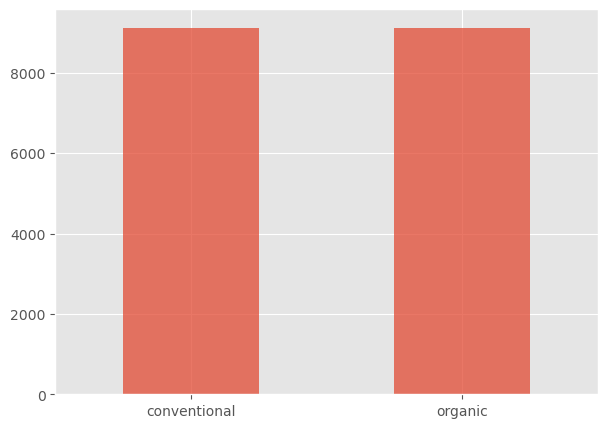

In [71]:
# Create a bar plot of the number of avocados sold by type
avocados_type.plot(kind="bar", alpha=0.75, rot=0, figsize=(7,5))

### Which avocado size is most popular?

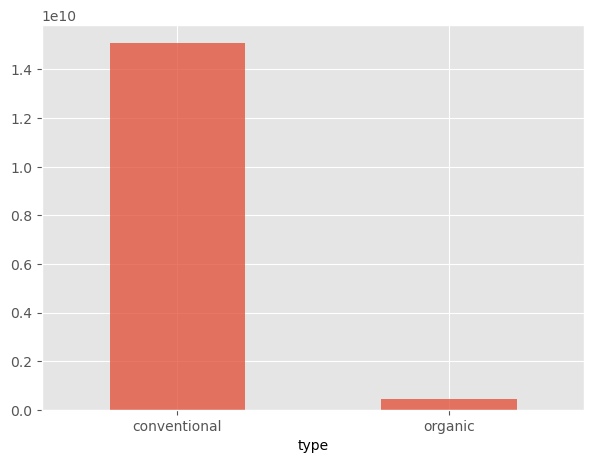

In [72]:
# Get the total number of avocados sold of each type
nb_sold_by_size = avocados.groupby("type")["Total Volume"].sum()

# Create a bar plot of the number of avocados sold by type
nb_sold_by_size.plot(kind="bar", alpha=0.75, rot=0, figsize=(7,5))

# Show the plot
plt.show()

### Changes in sales over time

In [73]:
avocados.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [74]:
avocados["Date"].min()

'2015-01-04'

In [77]:
avocados["Date"].max()

'2018-03-25'

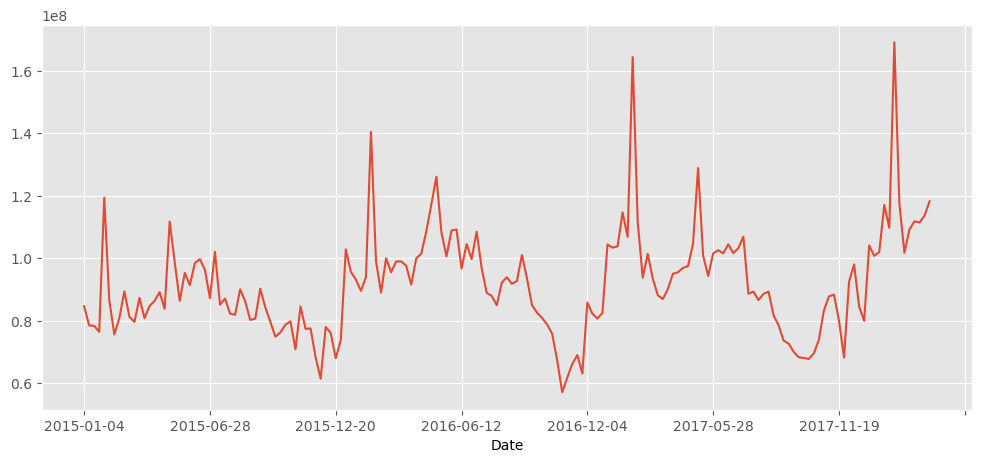

In [79]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("Date")["Total Volume"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line", figsize=(12,5))

# Show the plot
plt.show()


### Avocado supply and demand

In [80]:
avocados.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


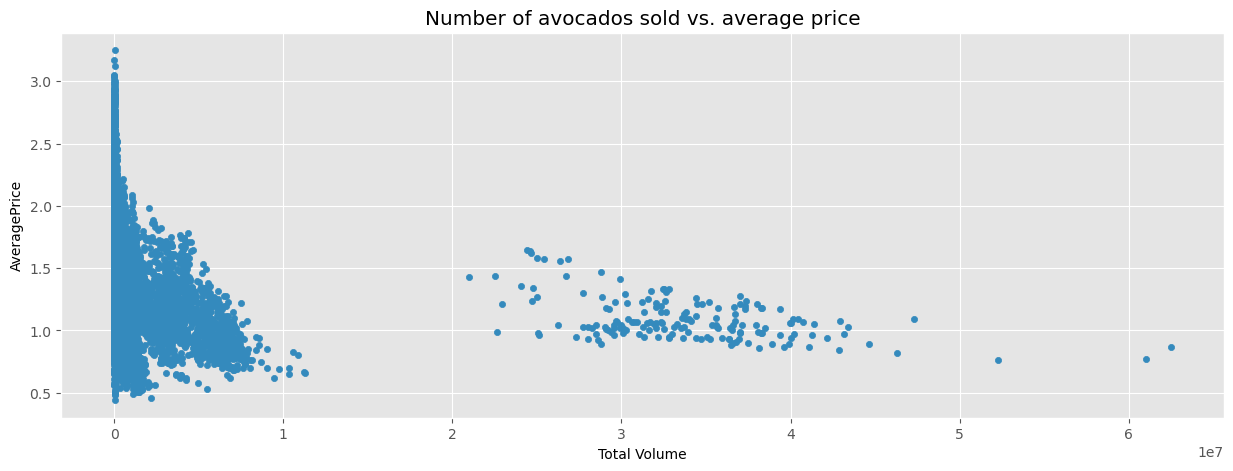

In [81]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="Total Volume", y="AveragePrice",
              kind="scatter", figsize=(15,5),
              title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

It looks like when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices

## Titanic

In [82]:
titanic = pd.read_csv("data/titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [84]:
import pandas as pd
import matplotlib.pyplot as plt

### Gender

<Axes: >

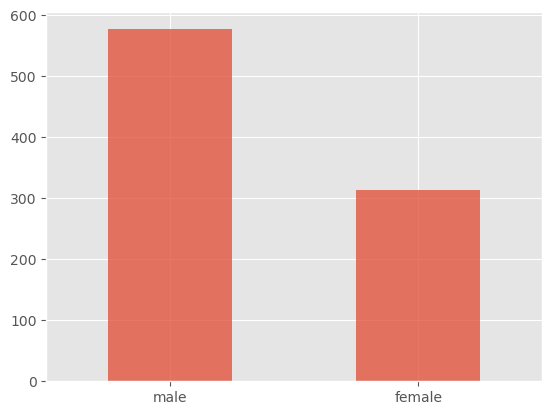

In [85]:
titanic["Sex"].value_counts().plot(kind='bar', alpha=0.75, rot=0,)

<Axes: ylabel='Sex'>

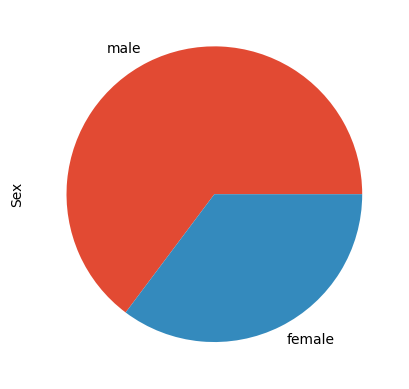

In [86]:
titanic['Sex'].value_counts().plot(kind='pie')

### Distribution 

<Axes: ylabel='Frequency'>

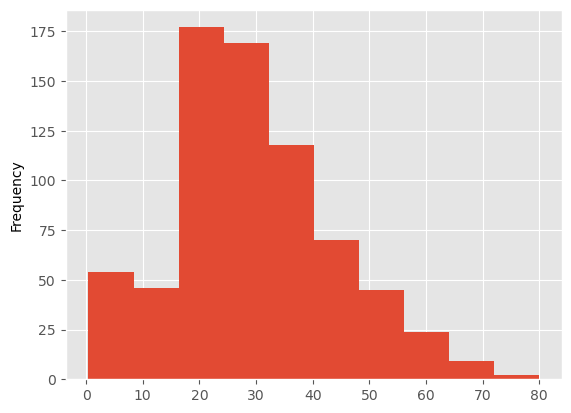

In [87]:
titanic['Age'].plot(kind ='hist')

### Associations

<Axes: xlabel='Age', ylabel='Fare'>

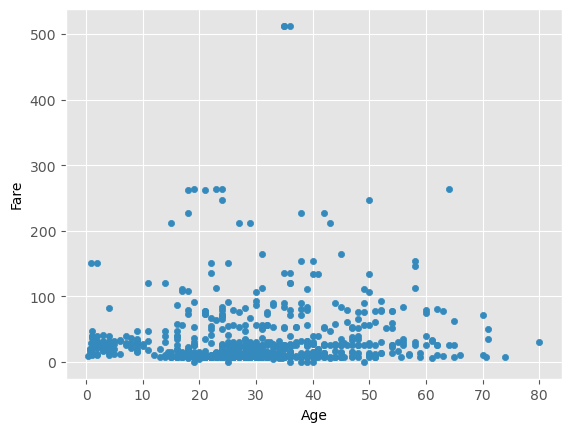

In [88]:
titanic.plot.scatter(x='Age',y='Fare')

In [ ]:
#homelessness = pd.read_csv("https://raw.githubusercontent.com/iacenter/CienciaDatos_Python_V2/main/data/homelessness.csv")

#homelessness.head()

In [ ]:
#pd.read_csv("https://raw.githubusercontent.com/iacenter/CienciaDatos_Python_V2/main/data/homelessness.csv")